In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv('sales.csv')
inventory = pd.read_csv('inventory.csv')

In [2]:
sales["revenue"] = sales["price"] * sales["quantity"]
total_revenue = sales['revenue'].sum()

# get total revenue
print(total_revenue)

32800


In [3]:
# get best selling category


best_category = sales.groupby('category')['quantity'].sum().sort_values(ascending=False)
print(best_category)

category
Chair    3
Table    2
Sofa     1
Name: quantity, dtype: int64


In [4]:
sales['profit'] = sales['price'] * sales['quantity']

In [5]:
#revenue per product


revenue_by_product = sales.groupby('product')['revenue'].sum().sort_values(ascending=False)
print(revenue_by_product)

product
Sofa Set        15000
Dining Table     8500
Bar Stool        3600
Coffee Table     3200
Office Chair     2500
Name: revenue, dtype: int64


In [6]:
# profit analysis

merged = sales.merge(inventory,on='product')
print(merged)

   sale_id        date       product category_x  price  quantity customer_id  \
0        1  2025-01-02  Office Chair      Chair   2500         1        C001   
1        2  2025-01-03  Dining Table      Table   8500         1        C002   
2        3  2025-01-03      Sofa Set       Sofa  15000         1        C003   
3        4  2025-01-04     Bar Stool      Chair   1800         2        C004   
4        5  2025-01-05  Coffee Table      Table   3200         1        C001   

   revenue  profit category_y  stock  cost_price  selling_price  
0     2500    2500    \tChair     20        1800           2500  
1     8500    8500    \tTable     10        6000           8500  
2    15000   15000     \tSofa      5       11000          15000  
3     3600    3600    \tChair     30        1200           1800  
4     3200    3200    \tTable     15        2200           3200  


In [7]:
print(merged)

   sale_id        date       product category_x  price  quantity customer_id  \
0        1  2025-01-02  Office Chair      Chair   2500         1        C001   
1        2  2025-01-03  Dining Table      Table   8500         1        C002   
2        3  2025-01-03      Sofa Set       Sofa  15000         1        C003   
3        4  2025-01-04     Bar Stool      Chair   1800         2        C004   
4        5  2025-01-05  Coffee Table      Table   3200         1        C001   

   revenue  profit category_y  stock  cost_price  selling_price  
0     2500    2500    \tChair     20        1800           2500  
1     8500    8500    \tTable     10        6000           8500  
2    15000   15000     \tSofa      5       11000          15000  
3     3600    3600    \tChair     30        1200           1800  
4     3200    3200    \tTable     15        2200           3200  


In [8]:
total_profit = merged['profit'].sum()
print(total_profit)

32800


In [9]:
#lowstock

In [10]:
#bestcustomerdassada

best_customer = sales.groupby('customer_id')['revenue'].sum().sort_values(ascending=False)
print(best_customer)

customer_id
C003    15000
C002     8500
C001     5700
C004     3600
Name: revenue, dtype: int64


In [11]:
data = {
    "sale_id": [1,2,3,4,5],
    "date": ["2025-01-02","2025-01-03","2025-01-03","2025-01-04","2025-01-05"],
    "product": ["Office Chair","Dining Table","Sofa Set","Bar Stool","Coffee Table"],
    "category": ["Chair","Table","Sofa","Chair","Table"],
    "price": [2500,8500,15000,1800,3200],
    "quantity": [1,1,1,2,1],
    "customer_id": ["C001","C002","C003","C004","C001"]
}

In [12]:
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df['revenue'] = df['price'] * df['quantity']
print(df)


   sale_id       date       product category  price  quantity customer_id  \
0        1 2025-01-02  Office Chair    Chair   2500         1        C001   
1        2 2025-01-03  Dining Table    Table   8500         1        C002   
2        3 2025-01-03      Sofa Set     Sofa  15000         1        C003   
3        4 2025-01-04     Bar Stool    Chair   1800         2        C004   
4        5 2025-01-05  Coffee Table    Table   3200         1        C001   

   revenue  
0     2500  
1     8500  
2    15000  
3     3600  
4     3200  


In [13]:
product_sales = df.groupby('product')['quantity'].sum()

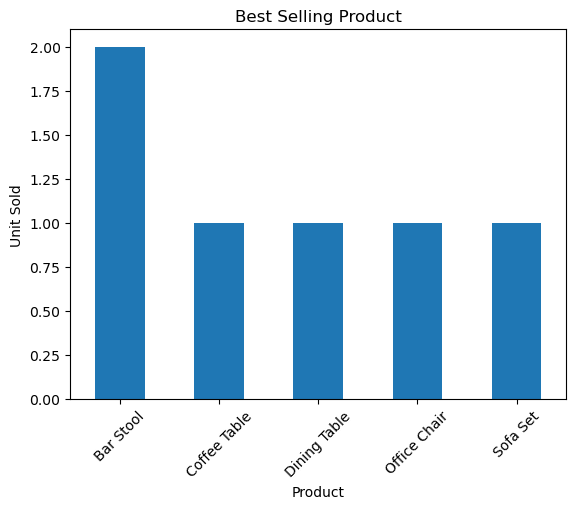

In [14]:
#bar chart

product_sales.plot(kind='bar')
plt.title('Best Selling Product')
plt.xlabel('Product')
plt.ylabel('Unit Sold')
plt.xticks(rotation=45)
plt.show()

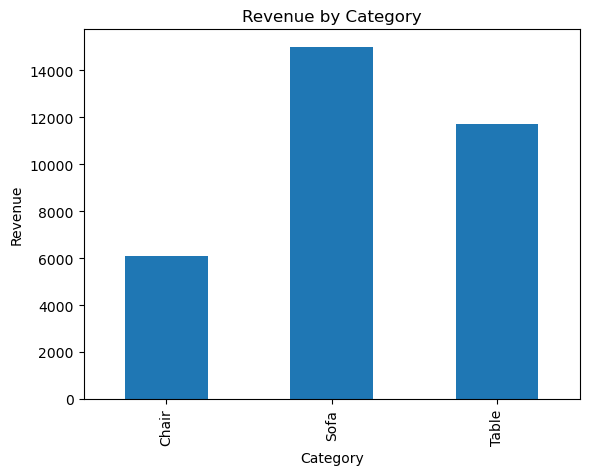

In [15]:
#revenue by category


category_revenue = df.groupby('category')['revenue'].sum()

category_revenue.plot(kind='bar')
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

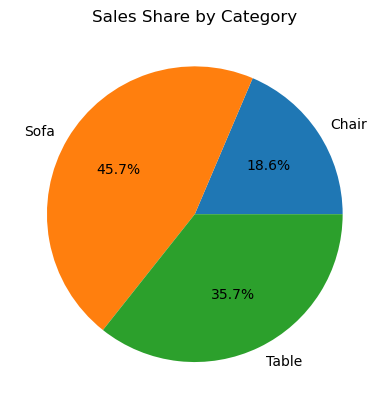

In [16]:
category_revenue.plot(kind='pie',autopct="%1.1f%%")
plt.title('Sales Share by Category')
plt.ylabel('')
plt.show()

In [17]:
df = pd.DataFrame({
    "price":[2500,8500,15000,1800,3200],
    "quantity":[1,1,1,2,1],
    "revenue":[2500,8500,15000,3600,3200],
    "customer_age":[22,28,30,26,24]
})

In [18]:
corr = df.corr(numeric_only=True)
print(corr)

                 price  quantity   revenue  customer_age
price         1.000000 -0.440388  0.990589      0.857769
quantity     -0.440388  1.000000 -0.313362      0.000000
revenue       0.990589 -0.313362  1.000000      0.907283
customer_age  0.857769  0.000000  0.907283      1.000000


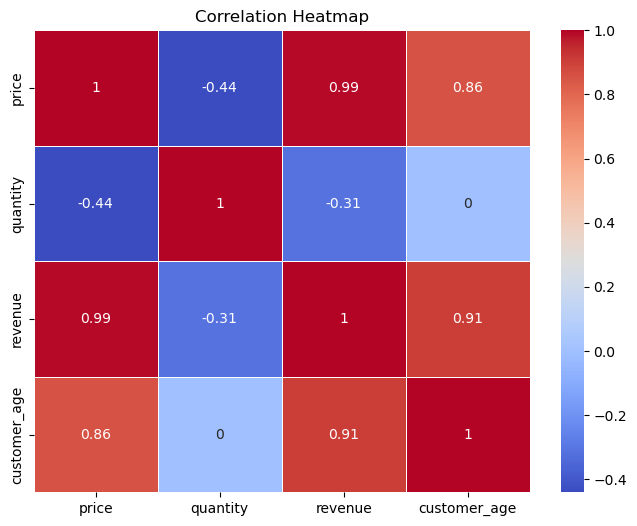

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
data = {
    "date": pd.date_range(start="2025-01-01", periods=12),
    "revenue": [2500,3000,3500,4000,3800,4200,4400,4600,4300,4800,5000,5200]
}


In [22]:
df = pd.DataFrame(data)
df.set_index("date", inplace=True)

In [ ]:
df['revenue'].plot(figsize=(10,5),marker="o")
plt.title('Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grind()

In [23]:
import pandas as pd

data = {
    "date": pd.date_range(start="2025-01-01", periods=12),
    "Office Chair": [2500,2600,2700,2800,3000,3100,3200,3300,3400,3500,3600,3700],
    "Dining Table": [8000,8100,8200,8300,8000,7800,7600,7400,7200,7000,6900,6800],
    "Sofa Set": [15000,15200,15400,15300,15500,15700,15800,16000,15900,15800,15700,15600],
}
